

```
# This is formatted as code
```

# Fase 1: Obtenció de dades

In [ ]:
import pandas as pd
from os.path import exists
from os import makedirs
ruta = '/content/sample_data/IOC/IABD/M2/data'
if not exists(ruta):
    makedirs(ruta)

ruta = ruta+'/prestecs.csv'

if not exists(ruta):
  !wget -O "/content/sample_data/IOC/IABD/M2/data/prestecs.csv" "https://drive.google.com/uc?id=1pqFguJw7xuNj7Uy09i27RCoT-t4_4P3C"

--2024-03-29 15:23:07--  https://drive.google.com/uc?id=1pqFguJw7xuNj7Uy09i27RCoT-t4_4P3C
Resolving drive.google.com (drive.google.com)... 142.250.65.110, 2607:f8b0:4025:804::200e
Connecting to drive.google.com (drive.google.com)|142.250.65.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1pqFguJw7xuNj7Uy09i27RCoT-t4_4P3C [following]
--2024-03-29 15:23:07--  https://drive.usercontent.google.com/download?id=1pqFguJw7xuNj7Uy09i27RCoT-t4_4P3C
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.164.1, 2607:f8b0:4025:803::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.164.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26276 (26K) [application/octet-stream]
Saving to: ‘/content/sample_data/IOC/IABD/M2/data/prestecs.csv’

/content/sample_dat 100%[===================>]  25.66K  --.-KB/s    in 0.001s  

2024-03-2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import pandas as pd

# models de classificació
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import random



In [ ]:
def print_evaluation(y_test, prediccions, average='weighted'):
  accuracy = accuracy_score(y_test, prediccions)
  precision = precision_score(y_test, prediccions, average=average)

  # Mostra de les mètriques amb 4 decimals
  print(f"Exactitud: {accuracy*100:.2f}%")
  print(f"Precisió: {precision*100:.2f}%")
  print(classification_report(y_test, prediccions, zero_division=1))
  ConfusionMatrixDisplay.from_predictions(y_test, prediccions);


# Fase 2: Preparació

In [ ]:
# Llegir el conjunt de dades
data = pd.read_csv(ruta)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
# verificació de les dades per a columnes de tipus string
# for col in data.columns:
#   print(data[col].value_counts())

In [ ]:
def format_data(data):
  from sklearn.preprocessing import LabelEncoder

  # Crea un objecte LabelEncoder
  label_encoder = LabelEncoder()

  # Converteix les variables categòriques a numèriques
  data['Gender'] = label_encoder.fit_transform(data['Gender'])
  data['Married'] = label_encoder.fit_transform(data['Married'])
  data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
  data['Education'] = label_encoder.fit_transform(data['Education'])
  data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
  data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
  data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

  # Comprovar quines files tenen valors NaN a la columna 'Loan_Amount_Term'
  nan_count = data['Loan_Amount_Term'].isna().sum()
  print("Número de files amb NaN a la columna 'Loan_Amount_Term':", nan_count)
  nan_count = data['Credit_History'].isna().sum()
  print("Número de files amb NaN a la columna 'Credit_History':", nan_count)
  print(f"Total valors: {data['Credit_History'].count()}")

  # neteja NaN's de les dades
  # data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
  # data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

  data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(method='ffill')
  data['Credit_History'] = data['Credit_History'].fillna(method='ffill')

  # Comprovar quines files tenen valors NaN a la columna 'Loan_Amount_Term'
  nan_count = data['Loan_Amount_Term'].isna().sum()
  print("Número de files amb NaN a la columna 'Loan_Amount_Term':", nan_count)
  nan_count = data['Credit_History'].isna().sum()
  print("Número de files amb NaN a la columna 'Credit_History':", nan_count)

  # Eliminar identificador y resultat
  X = data.drop(columns=['Loan_ID', 'Loan_Status'])
  # X['Married']
  # Recuperar columna resultat
  y = data['Loan_Status']
  return (X, y)

Número de files amb NaN a la columna 'Loan_Amount_Term': 11
Número de files amb NaN a la columna 'Credit_History': 30
Total valors: 351
Número de files amb NaN a la columna 'Loan_Amount_Term': 0
Número de files amb NaN a la columna 'Credit_History': 0


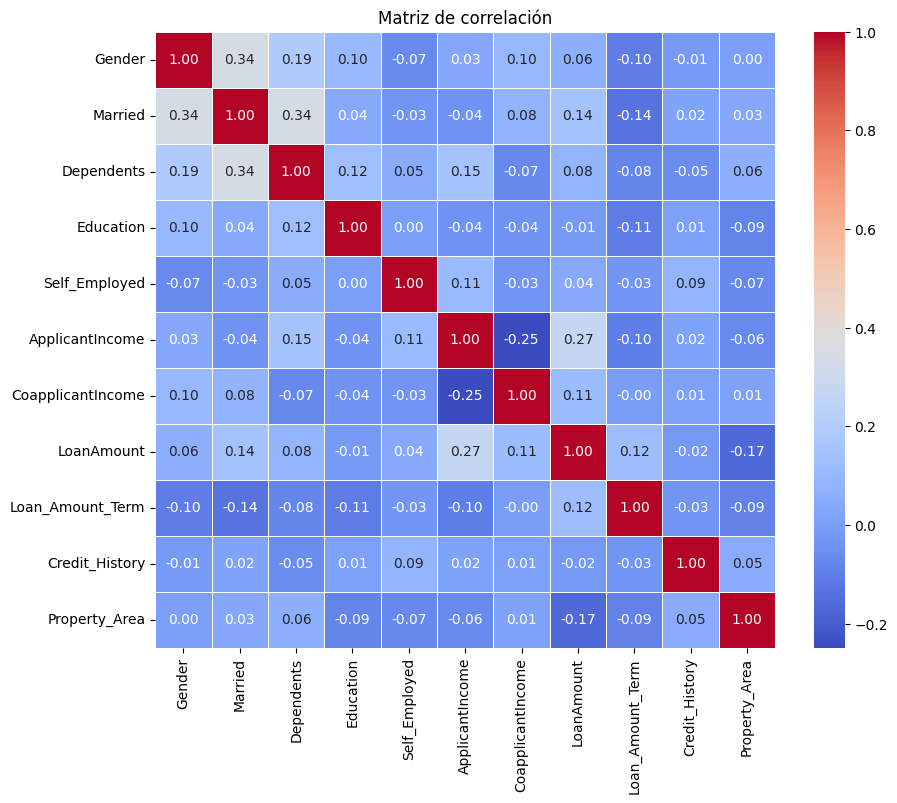

In [ ]:
X,y = format_data(data)

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriu de correlación
correlation_matrix = X.corr()

# Visualitzar la matriu de correlació com un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación')
plt.show()


# Fase 3: Execució
Sense cap manipulació vectoritzar, o manipular pesos

In [ ]:
# Dividir el conjunt de dades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Adaboost
adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)

In [ ]:
# ANN
# Definició de la xarxa neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))
ann_pred = model.predict(X_test)

Epoch 1/10
31/31 [==============================] - 5s 41ms/step - loss: 18.2194 - accuracy: 0.6151 - val_loss: 18.2685 - val_accuracy: 0.3636
Epoch 2/10
31/31 [==============================] - 0s 14ms/step - loss: 3.7908 - accuracy: 0.6151 - val_loss: 21.7653 - val_accuracy: 0.7403
Epoch 3/10
31/31 [==============================] - 1s 16ms/step - loss: 3.7219 - accuracy: 0.6283 - val_loss: 10.7565 - val_accuracy: 0.4416
Epoch 4/10
31/31 [==============================] - 0s 15ms/step - loss: 7.3016 - accuracy: 0.6184 - val_loss: 13.8949 - val_accuracy: 0.7273
Epoch 5/10
31/31 [==============================] - 0s 7ms/step - loss: 5.9757 - accuracy: 0.6184 - val_loss: 25.5495 - val_accuracy: 0.6883
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 9.5392 - accuracy: 0.6513 - val_loss: 32.1386 - val_accuracy: 0.3247
Epoch 7/10
31/31 [==============================] - 0s 9ms/step - loss: 6.3863 - accuracy: 0.6184 - val_loss: 13.6473 - val_accuracy: 0.7143
Epoch 8/

# Fase 4: Evaluació

SVM Classification Report:
Exactitud: 72.73%
Precisió: 52.89%
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        21
           1       0.73      1.00      0.84        56

    accuracy                           0.73        77
   macro avg       0.86      0.50      0.42        77
weighted avg       0.80      0.73      0.61        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


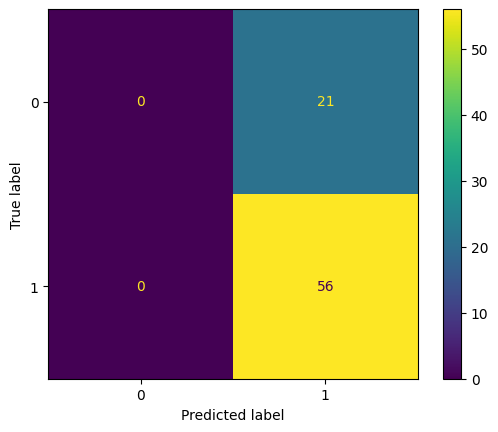

In [ ]:
print("SVM Classification Report:")
print_evaluation(y_test, svm_pred)


Decision Tree Classification Report:
Exactitud: 77.92%
Precisió: 76.62%
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        21
           1       0.79      0.95      0.86        56

    accuracy                           0.78        77
   macro avg       0.75      0.64      0.66        77
weighted avg       0.77      0.78      0.75        77



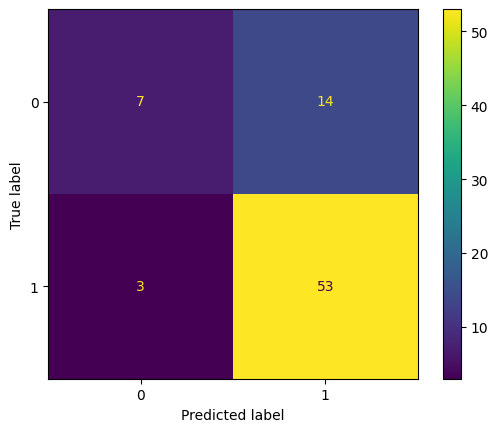

In [ ]:
print("\nDecision Tree Classification Report:")
print_evaluation(y_test, dt_pred)


Random Forest Classification Report:
Exactitud: 81.82%
Precisió: 83.07%
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77



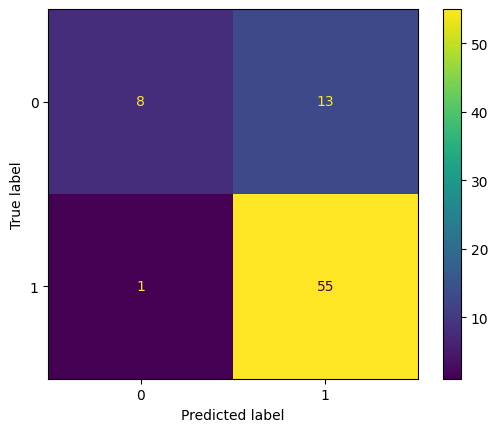

In [ ]:
print("\nRandom Forest Classification Report:")
print_evaluation(y_test, rf_pred)


Adaboost Classification Report:
Exactitud: 77.92%
Precisió: 76.36%
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        21
           1       0.80      0.93      0.86        56

    accuracy                           0.78        77
   macro avg       0.73      0.65      0.67        77
weighted avg       0.76      0.78      0.76        77



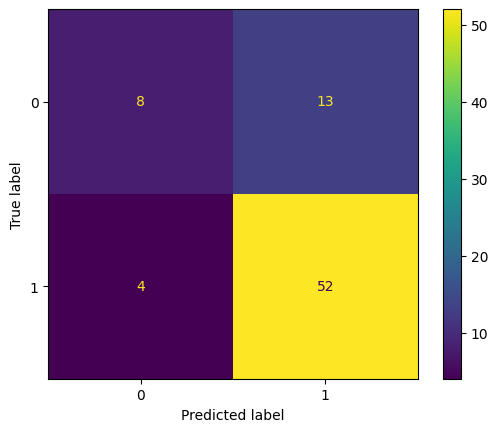

In [ ]:
print("\nAdaboost Classification Report:")
print_evaluation(y_test, adaboost_pred)


ANN Classification Report:
3/3 [==============================] - 0s 6ms/step - loss: 12.0494 - accuracy: 0.4805
loss: 12.049418449401855
accuracy: 0.48051947355270386


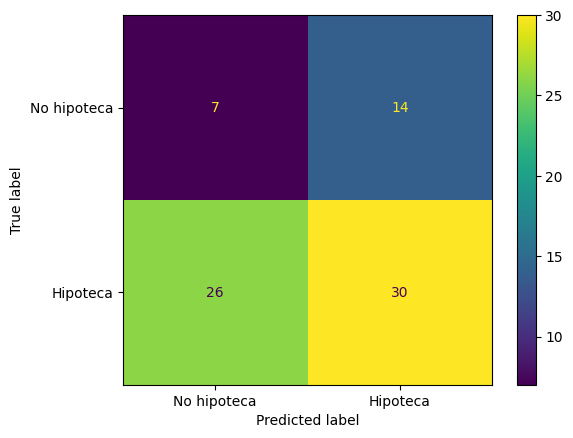

In [ ]:
print("\nANN Classification Report:")
eval  = model.evaluate(X_test, y_test)
# precision = precision_score(y_test, ann_pred, average='weighted')

# Mostra de les mètriques amb 4 decimals
print(f"loss: {eval[0]*100:.2f}%")
print(f"accuracy: {eval[1]*100:.2f}%}")
cm = confusion_matrix(y_test, ann_pred.round())  # Arrodoneix les prediccions a 0 o 1

# Visualitzar la matriu de confusió amb ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No hipoteca', 'Hipoteca'])
disp.plot()
plt.show()

# Fase 5: Conclusió

De les probes que hem realitzat, deduim que no tenim un conjunt de dades lineals, per la baixa correlació

La primera impressió sense realitzar cap adjustament, l'algoritme de classificació ANN ha sigut el mes optim, esta lluny de ser un algoritme efficient, pero intetarem fer millores.

Hemo pogut observar que havía 11 NaN values y 30 NaN values en un altre. donat que només tenim 340 casos, no ens podem permetre eliminar aquests, per tant es decideix omplir els nans. S'ha fet una prova amb fill mean value o ffill, el segon ha donat millors resultats.

El plan es:
* Buscar els millos hiperparametres per ANN
* Evaluar resultats
* Vectoritzar entrada de dades per que tinguin una mida similar
* fer servir vectorització y búsqueda de hiperparametres junt

# Fase 2: Preparació
En aquest cas, realitzarem la búsqueda d'hiperparàmetres per millorar la qualitat del model

In [ ]:
# Llegir el conjunt de dades
data = pd.read_csv(ruta)

(X,y) = format_data(data)

Número de files amb NaN a la columna 'Loan_Amount_Term': 11
Número de files amb NaN a la columna 'Credit_History': 30
Total valors: 351
Número de files amb NaN a la columna 'Loan_Amount_Term': 0
Número de files amb NaN a la columna 'Credit_History': 0


# Fase 3: Execució

In [ ]:
from sklearn.model_selection import GridSearchCV

# Dividir el conjunt de dades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defineix els hiperparàmetres a provar
svc_param_grid = {
    'kernel': ['rbf','poly'],
    'degree': [2,3,4]

}

# Crea un model
svm_model = SVC(random_state=42)

# Cerca d'hiperparàmetres amb validació creuada
grid_search = GridSearchCV(estimator=svm_model, param_grid=svc_param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# mostra quins hiperparametres s'han trobat
print(f"Hiperparmaeteres: {grid_search.best_estimator_}")

# Avalua el model amb els millors hiperparàmetres
best_svm_model = grid_search.best_estimator_
svm_accuracy = best_svm_model.score(X_test, y_test)
svm_pred = best_svm_model.predict(X_test)

Hiperparmaeteres: SVC(degree=2, random_state=42)


In [ ]:
# Defineix els hiperparàmetres a provar
dt_param_grid = {
    # 'criterion': ['gini','entropy', 'log_loss']
    # 'splitter': ['best','random'],
    # 'max_depth': [None, 10, 20, 30],
    'criterion': ['entropy'],
    'max_depth': [10],
    'min_samples_split': [10],
}

# Crea un model
dt_model = DecisionTreeClassifier(random_state=42)

# Cerca d'hiperparàmetres amb validació creuada
grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# mostra quins hiperparametres s'han trobat
print(f"Hiperparmaeteres: {grid_search.best_estimator_}")

# Avalua el model amb els millors hiperparàmetres
best_dt_model = grid_search.best_estimator_
dt_accuracy = best_dt_model.score(X_test, y_test)
dt_pred = best_dt_model.predict(X_test)

Hiperparmaeteres: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)


In [ ]:
# Defineix els hiperparàmetres a provar
rf_param_grid = {
    # 'criterion': ['gini','entropy', 'log_loss']
    # 'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    # 'max_features': ['sqrt', 'log2'],  # Número máximo de características a considerar en cada división
    # 'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    # 'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    # 'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser una hoja
    # 'bootstrap': [True, False]  # Método de remuestreo con o sin reemplazo
    'criterion': ['entropy'],
    'n_estimators': [ 200],
    'max_depth': [10],
    'min_samples_split': [10],
}

# Crea un model
rf_model = RandomForestClassifier(random_state=42)

# Cerca d'hiperparàmetres amb validació creuada
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# mostra quins hiperparametres s'han trobat
print(f"Hiperparmaeteres: {grid_search.best_estimator_}")

# Avalua el model amb els millors hiperparàmetres
best_rf_model = grid_search.best_estimator_
rf_accuracy = best_rf_model.score(X_test, y_test)
rf_pred = best_rf_model.predict(X_test)

Hiperparmaeteres: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=200, random_state=42)


In [ ]:
# Defineix els hiperparàmetres a provar
adaboost_param_grid = {
    # 'n_estimators': [50, 100, 200],
    # 'learning_rate': [0.1, 0.5, 1.0],
    # 'algorithm': ['SAMME', 'SAMME.R']
    'learning_rate': [0.1],
    'algorithm': ['SAMME']
}

# Crea un model
model = AdaBoostClassifier(random_state=42)

# Cerca d'hiperparàmetres amb validació creuada
grid_search = GridSearchCV(estimator=model, param_grid=adaboost_param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# mostra quins hiperparametres s'han trobat
print(f"Hiperparmaeteres: {grid_search.best_estimator_}")

# Avalua el model amb els millors hiperparàmetres
best_adaboost_model = grid_search.best_estimator_
adaboost_accuracy = best_adaboost_model.score(X_test, y_test)
adaboost_pred = best_adaboost_model.predict(X_test)

Hiperparmaeteres: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=42)


In [ ]:
!pip install scikeras

In [ ]:
# trobar millor activador

def compile_model(activador='relu'):
  model = Sequential([
      Dense(128, activation=activador, input_shape=(X_train.shape[1],)),
      Dense(64, activation=activador),
      Dense(32, activation=activador),
      Dense(1, activation='sigmoid')
  ])
  return model
# Creem una llista de les funcions d'activació que volem provar
activadors = ['relu', 'tanh', 'sigmoid', 'linear']

# Creem una llista per emmagatzemar els resultats
best_activador = None

for activation in activadors:
    model = compile_model(activador=activation)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenem el model amb les dades d'entrenament
    model.fit(X_train, y_train, epochs=10, batch_size=10)

    # Fem prediccions amb les dades de prova
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculem l'exactitud del model i l'emmagatzemem
    result = model.evaluate(X_test, y_test)
    if best_activador is None:
      best_activador = (activation, result)
    else:
      print(best_activador)
      print('vs')
      print(result)
      best_loss = best_activador[1][0]
      current_loss = result[0]
      best_accuracy = best_activador[1][1]
      current_accuracy = result[1]
      if current_accuracy > best_accuracy and current_loss < best_loss:
        best_activador = (activation, result)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 52.5526 - accuracy: 0.5757
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 6.9141 - accuracy: 0.6382
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 5.1709 - accuracy: 0.6151
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 6.5410 - accuracy: 0.6184
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 5.0251 - accuracy: 0.6480
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 6.3242 - accuracy: 0.6053
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 4.8266 - accuracy: 0.6480
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 4.1089 - accuracy: 0.6645
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 4.3903 - accuracy: 0.6447
Epoch 10/10
3/3 [==============================] - 0s 8ms/step - loss: 10.0123 - accuracy: 0.6623
Epoch 1/10
31/31 [=

3/3 [==============================] - 0s 6ms/step


3/3 [==============================] - 0s 6ms/step - loss: 31.2177 - accuracy: 0.7273
('tanh', [0.6867527961730957, 0.7272727489471436])
vs
[31.217748641967773, 0.7272727489471436]


In [ ]:
print(best_activador)

('tanh', [0.6867527961730957, 0.7272727489471436])


In [ ]:
def create_model(optimizer='adam'):
  activador = best_activador[0]
  model = Sequential([
      Dense(128, activation=activador, input_shape=(X_train.shape[1],)),
      Dense(64, activation=activador),
      Dense(32, activation=activador),
      Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# # Defineix la graella d'hiperparàmetres
param_grid = {
    'epochs': [10, 20, 30, 40],
    'batch_size': [10, 32],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

from scikeras.wrappers import KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)
# # Cerca de graella amb validació creuada
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# # Obté i imprimeix els millors paràmetres trobats
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

model = grid_result.best_estimator_

# # Fem prediccions amb les dades de prova
preds = model.predict(X_test)

Best Parameters: {'batch_size': 10, 'epochs': 10, 'optimizer': 'rmsprop'}


In [ ]:
import numpy as np
binary_preds = np.where(preds > 0.5, 1, 0)

# Fase 4: Evaluació

SVM Classification Report:
Exactitud: 72.73%
Precisió: 52.89%
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        21
           1       0.73      1.00      0.84        56

    accuracy                           0.73        77
   macro avg       0.86      0.50      0.42        77
weighted avg       0.80      0.73      0.61        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


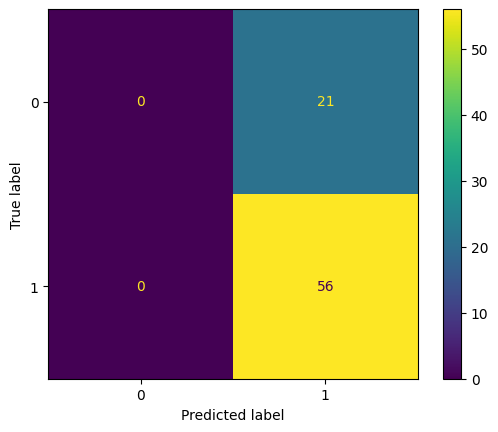

In [ ]:
print("SVM Classification Report:")
print_evaluation(y_test, svm_pred)


Decision Tree Classification Report:
Exactitud: 72.73%
Precisió: 73.14%
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        21
           1       0.82      0.80      0.81        56

    accuracy                           0.73        77
   macro avg       0.66      0.66      0.66        77
weighted avg       0.73      0.73      0.73        77



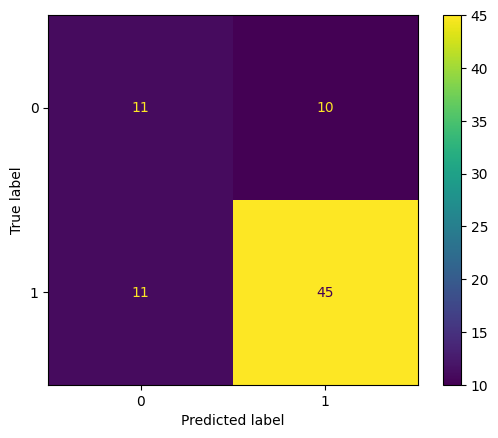

In [ ]:
print("\nDecision Tree Classification Report:")
print_evaluation(y_test, dt_pred)


Random Forest Classification Report:
Exactitud: 80.52%
Precisió: 80.43%
              precision    recall  f1-score   support

           0       0.80      0.38      0.52        21
           1       0.81      0.96      0.88        56

    accuracy                           0.81        77
   macro avg       0.80      0.67      0.70        77
weighted avg       0.80      0.81      0.78        77



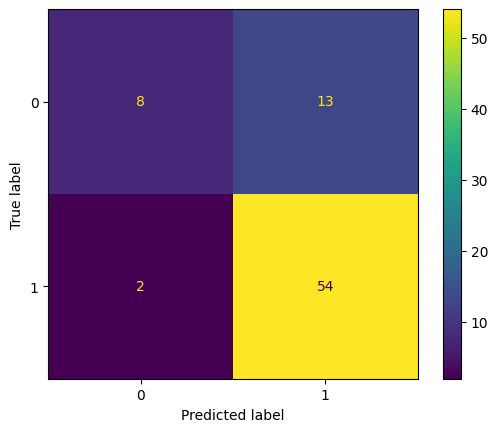

In [ ]:
print("\nRandom Forest Classification Report:")
print_evaluation(y_test, rf_pred)


Adaboost Classification Report:
Exactitud: 81.82%
Precisió: 83.07%
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77



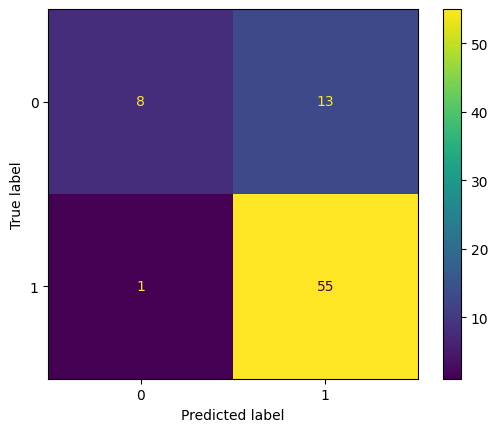

In [ ]:
print("\nAdaboost Classification Report:")
print_evaluation(y_test, adaboost_pred)

In [ ]:
print("\nANN Classification Report:")
# Imprimim els resultats
print(f"loss: {eval[0]}")
print(f"accuracy: {eval[1]*100:.2f}%")
accuracy = accuracy_score(y_test, binary_preds)
print(f"Accuracy score: {accuracy*100:.2f}%")


ANN Classification Report:
loss: 12.049418449401855
accuracy: 48.05%
Accuracy score: 72.73%


# Fase 5: Conclusió

Després de buscar els millors hiperparàmetres hem pogut observar una mínima variació en les prediccions, sent el millor model AdaBoost amb una precissió del 82%.

Com apreciació, es pot comprobar que els positus arriba a una precissio del 81% mentre que els negatius al 89%, en canvi si ens fixem en el f1 score o en el gráfic veurem que realmente esta encertant un 53% dels negatius sen't un cas greu ja que estem diagnosticant com a positiu un cas negatiu.

Referent a la xarxa neuronal, podem, observar que el millor en accuracy ha sigut sigmoid y linear, encontra de les meves prediccions, pero per contra tenen una gran perdua, llavors segons els números, amb una perdua del 12% y un accuracy del 68% la capa d'activació relu es la que millor funciona, tot i tenir una precissiío bastant baixa.


        Resultat  precision    recall  f1-score   support

        Negatiu       0.89      0.38      0.53        21
        Positiu       0.81      0.98      0.89        56

# Fase 2: Preparació
En aquest cas evaluarem el model vectoritzant les dades abans de processarles fent servir els hiperparametres trobats anteriorment per intentar extreure el millor

In [ ]:
# Llegir el conjunt de dades
data = pd.read_csv(ruta)

(X,y) = format_data(data)

Número de files amb NaN a la columna 'Loan_Amount_Term': 11
Número de files amb NaN a la columna 'Credit_History': 30
Total valors: 351
Número de files amb NaN a la columna 'Loan_Amount_Term': 0
Número de files amb NaN a la columna 'Credit_History': 0


In [ ]:
# Vectorització de les dades
def min_max_scaler(dades):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  scaler.fit(dades.values.reshape(-1,1))
  return scaler.transform(dades.values.reshape(-1,1))

In [ ]:
X['ApplicantIncome'] = min_max_scaler(X['ApplicantIncome'])
X['CoapplicantIncome'] = min_max_scaler(X['CoapplicantIncome'])
X['LoanAmount'] = min_max_scaler(X['LoanAmount'])
X['Loan_Amount_Term'] = min_max_scaler(X['Loan_Amount_Term'])
X['Credit_History'] = min_max_scaler(X['Credit_History'])

In [ ]:
# Una mostra de dades vectoritzades
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,0.464043,0.044567,0.843972,0.743590,1.0,0
1,1,1,0,0,1,0.298336,0.000000,0.404255,0.743590,1.0,2
2,1,1,0,1,0,0.254684,0.069687,0.787234,0.743590,1.0,2
3,1,0,0,0,0,0.612373,0.000000,0.936170,0.743590,1.0,2
4,1,1,0,1,0,0.228515,0.044803,0.609929,0.743590,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,0.581283,0.000000,0.843972,0.743590,1.0,2
377,1,1,0,0,0,0.322621,0.057629,0.702128,0.743590,1.0,0
378,0,0,0,0,0,0.287868,0.000000,0.439716,0.743590,1.0,0
379,1,1,3,0,0,0.414111,0.000000,0.219858,0.358974,1.0,0


# Fase 3: Execució
Vectorització i ús d'hiperparàmetres

In [ ]:
# Dividir el conjunt de dades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SVM
svm_model = SVC(degree=2, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [ ]:
# Adaboost
adaboost_model = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)

In [ ]:
# ANN
# Best Parameters: {'batch_size': 10, 'epochs': 20, 'optimizer': 'adam'}
# Definició de la xarxa neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))
ann_pred = model.predict(X_test)

Epoch 1/20
28/31 [==========================>...] - ETA: 0s - loss: 0.6260 - accuracy: 0.6821 

31/31 [==============================] - 1s 13ms/step - loss: 0.6190 - accuracy: 0.6842 - val_loss: 0.5421 - val_accuracy: 0.7273
Epoch 2/20
31/31 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.7204 - val_loss: 0.5148 - val_accuracy: 0.7273
Epoch 3/20
31/31 [==============================] - 0s 6ms/step - loss: 0.4797 - accuracy: 0.8092 - val_loss: 0.4986 - val_accuracy: 0.8182
Epoch 4/20
31/31 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8454 - val_loss: 0.5025 - val_accuracy: 0.8182
Epoch 5/20
31/31 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.8454 - val_loss: 0.5247 - val_accuracy: 0.8182
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8454 - val_loss: 0.4951 - val_accuracy: 0.8182
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8421 - val_loss: 0.5135 - val_accuracy: 0.8182
Epoch 8/20
31/31 [============

# Fase 4: Evaluació

SVM Classification Report:
Exactitud: 81.82%
Precisió: 83.07%
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77



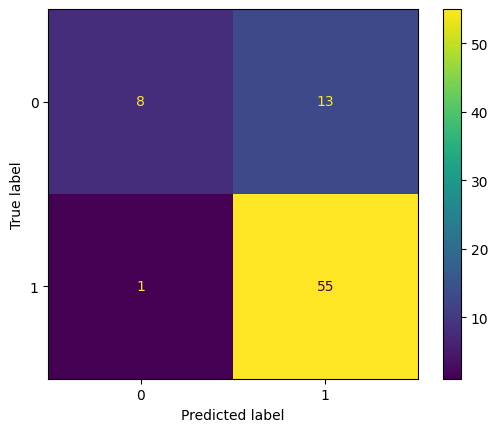

In [ ]:
print("SVM Classification Report:")
print_evaluation(y_test, svm_pred)


Decision Tree Classification Report:
Exactitud: 72.73%
Precisió: 73.14%
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        21
           1       0.82      0.80      0.81        56

    accuracy                           0.73        77
   macro avg       0.66      0.66      0.66        77
weighted avg       0.73      0.73      0.73        77



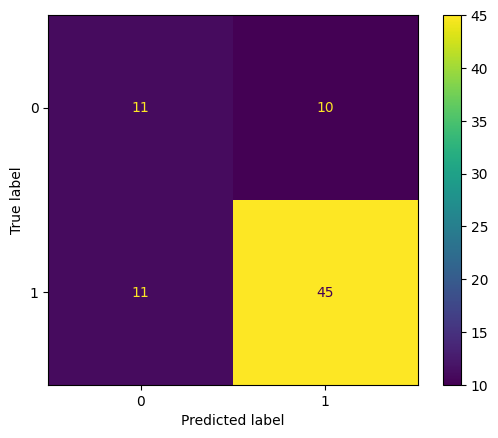

In [ ]:
print("\nDecision Tree Classification Report:")
print_evaluation(y_test, dt_pred)


Random Forest Classification Report:
Exactitud: 80.52%
Precisió: 80.43%
              precision    recall  f1-score   support

           0       0.80      0.38      0.52        21
           1       0.81      0.96      0.88        56

    accuracy                           0.81        77
   macro avg       0.80      0.67      0.70        77
weighted avg       0.80      0.81      0.78        77



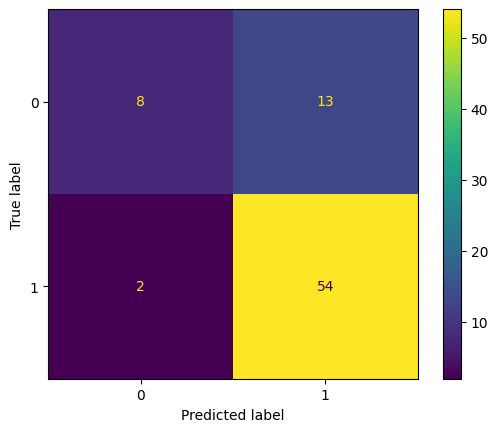

In [ ]:
print("\nRandom Forest Classification Report:")
print_evaluation(y_test, rf_pred)


Adaboost Classification Report:
Exactitud: 81.82%
Precisió: 83.07%
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77



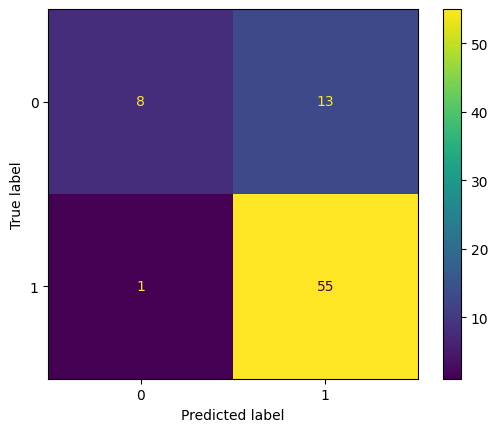

In [ ]:
print("\nAdaboost Classification Report:")
print_evaluation(y_test, adaboost_pred)


ANN Classification Report:
3/3 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6234
loss: 0.6636095643043518
accuracy: 0.6233766078948975


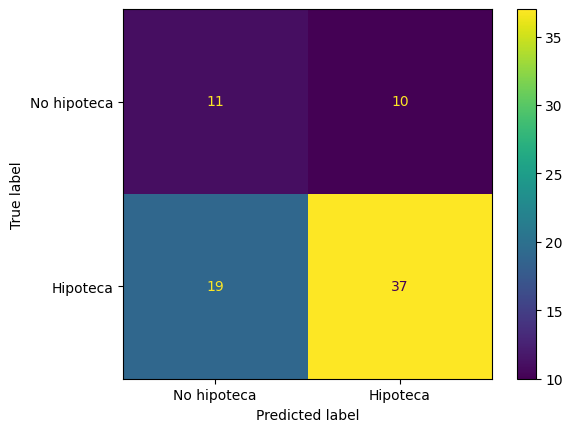

In [ ]:
print("\nANN Classification Report:")
eval  = model.evaluate(X_test, y_test)
# precision = precision_score(y_test, ann_pred, average='weighted')

# Mostra de les mètriques amb 4 decimals
print(f"loss: {eval[0]*100:.2f}%")
print(f"accuracy: {eval[1]*100:.2f}%")
cm = confusion_matrix(y_test, ann_pred.round())  # Arrodoneix les prediccions a 0 o 1

# Visualitzar la matriu de confusió amb ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No hipoteca', 'Hipoteca'])
disp.plot()
plt.show()

# Fase 5: Conclusió

Podem observar una gran millora en el resultat d'alguns algoritmes que estaven funcioonant molt malament donant falsos positus quan eren negatius com el cas de SVC, no obstant Ada boost no s'ha vist beneficiat, per tant la seguent probar es aplicar un PCA per veure si millora el resultat.

# Fase 2: Preparació
En aquest cas evaluarem el model vectoritzant les dades abans de processarles fent servir els hiperparametres trobats anteriorment per intentar extreure el millor

In [ ]:
# Llegir el conjunt de dades
data = pd.read_csv(ruta)

(X,y) = format_data(data)

Número de files amb NaN a la columna 'Loan_Amount_Term': 11
Número de files amb NaN a la columna 'Credit_History': 30
Total valors: 351
Número de files amb NaN a la columna 'Loan_Amount_Term': 0
Número de files amb NaN a la columna 'Credit_History': 0


In [ ]:
# Vectorització de les dades
def min_max_scaler(dades):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  scaler.fit(dades.values.reshape(-1,1))
  return scaler.transform(dades.values.reshape(-1,1))

In [ ]:
X['ApplicantIncome'] = min_max_scaler(X['ApplicantIncome'])
X['CoapplicantIncome'] = min_max_scaler(X['CoapplicantIncome'])
X['LoanAmount'] = min_max_scaler(X['LoanAmount'])
X['Loan_Amount_Term'] = min_max_scaler(X['Loan_Amount_Term'])
X['Credit_History'] = min_max_scaler(X['Credit_History'])

In [ ]:
# Una mostra de dades vectoritzades
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,0.464043,0.044567,0.843972,0.743590,1.0,0
1,1,1,0,0,1,0.298336,0.000000,0.404255,0.743590,1.0,2
2,1,1,0,1,0,0.254684,0.069687,0.787234,0.743590,1.0,2
3,1,0,0,0,0,0.612373,0.000000,0.936170,0.743590,1.0,2
4,1,1,0,1,0,0.228515,0.044803,0.609929,0.743590,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,0.581283,0.000000,0.843972,0.743590,1.0,2
377,1,1,0,0,0,0.322621,0.057629,0.702128,0.743590,1.0,0
378,0,0,0,0,0,0.287868,0.000000,0.439716,0.743590,1.0,0
379,1,1,3,0,0,0.414111,0.000000,0.219858,0.358974,1.0,0


# Fase 3: Execució
Vectorització, us d'hiperparametres del cas anterior y PCA

In [ ]:
# Dividir el conjunt de dades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
# SVM
svm_model = SVC(degree=2, random_state=42)
svm_model.fit(X_train_pca, y_train)
svm_pred = svm_model.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)
dt_model.fit(X_train_pca, y_train)
dt_pred = dt_model.predict(X_test_pca)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=200, random_state=42)
rf_model.fit(X_train_pca, y_train)
rf_pred = rf_model.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Adaboost
adaboost_model = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train_pca, y_train)
adaboost_pred = adaboost_model.predict(X_test_pca)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)


In [ ]:
# ANN
# Best Parameters: {'batch_size': 10, 'epochs': 20, 'optimizer': 'adam'}
# Definició de la xarxa neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))
ann_pred = model.predict(X_test)

Epoch 1/20
31/31 [==============================] - 1s 9ms/step - loss: 0.6180 - accuracy: 0.7138 - val_loss: 0.5625 - val_accuracy: 0.7273
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.7072 - val_loss: 0.5463 - val_accuracy: 0.7273
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7171 - val_loss: 0.5365 - val_accuracy: 0.7662
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7862 - val_loss: 0.5087 - val_accuracy: 0.8052
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.8289 - val_loss: 0.5048 - val_accuracy: 0.8182
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8421 - val_loss: 0.4970 - val_accuracy: 0.8182
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8454 - val_loss: 0.4911 - val_accuracy: 0.8182
Epoch 8/20
31/31 [==

# Fase 4: Evaluació

SVM Classification Report:
Exactitud: 76.62%
Precisió: 74.74%
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        21
           1       0.80      0.91      0.85        56

    accuracy                           0.77        77
   macro avg       0.71      0.65      0.66        77
weighted avg       0.75      0.77      0.75        77



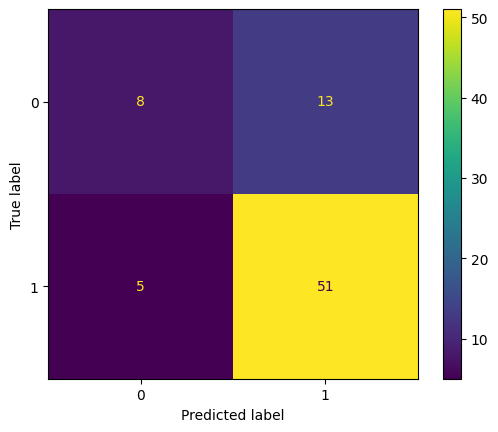

In [ ]:
print("SVM Classification Report:")
print_evaluation(y_test, svm_pred)


Decision Tree Classification Report:
Exactitud: 58.44%
Precisió: 65.29%
              precision    recall  f1-score   support

           0       0.33      0.52      0.41        21
           1       0.77      0.61      0.68        56

    accuracy                           0.58        77
   macro avg       0.55      0.57      0.54        77
weighted avg       0.65      0.58      0.61        77



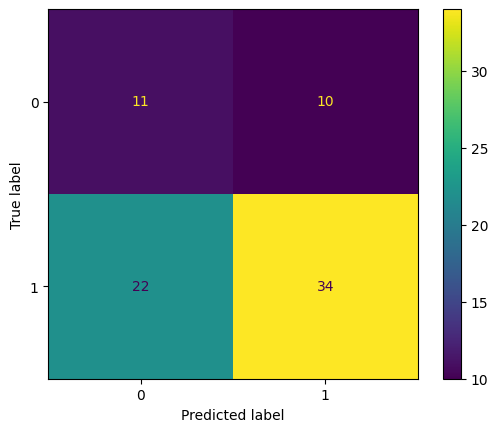

In [ ]:
print("\nDecision Tree Classification Report:")
print_evaluation(y_test, dt_pred)


Random Forest Classification Report:
Exactitud: 66.23%
Precisió: 64.17%
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        21
           1       0.75      0.80      0.78        56

    accuracy                           0.66        77
   macro avg       0.55      0.54      0.55        77
weighted avg       0.64      0.66      0.65        77



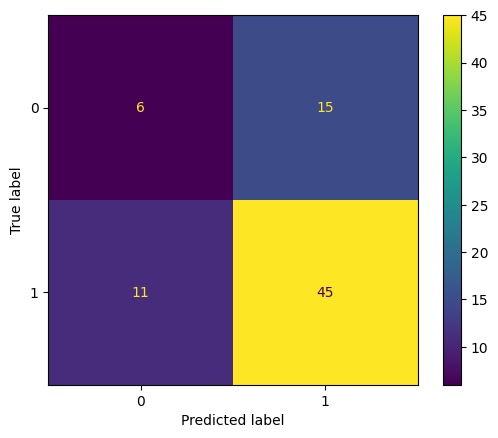

In [ ]:
print("\nRandom Forest Classification Report:")
print_evaluation(y_test, rf_pred)


Adaboost Classification Report:
Exactitud: 68.83%
Precisió: 63.91%
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        21
           1       0.74      0.88      0.80        56

    accuracy                           0.69        77
   macro avg       0.55      0.53      0.53        77
weighted avg       0.64      0.69      0.65        77



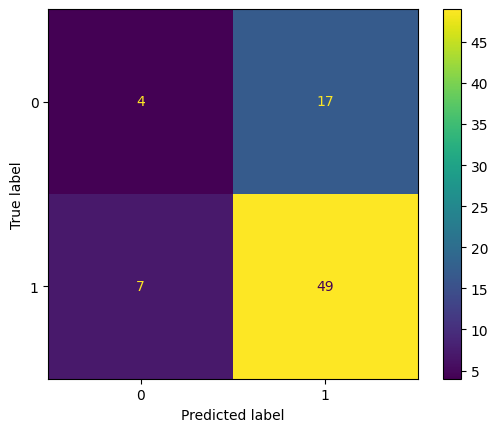

In [ ]:
print("\nAdaboost Classification Report:")
print_evaluation(y_test, adaboost_pred)


ANN Classification Report:
3/3 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7792
loss: 54.16%
accuracy: 77.92%


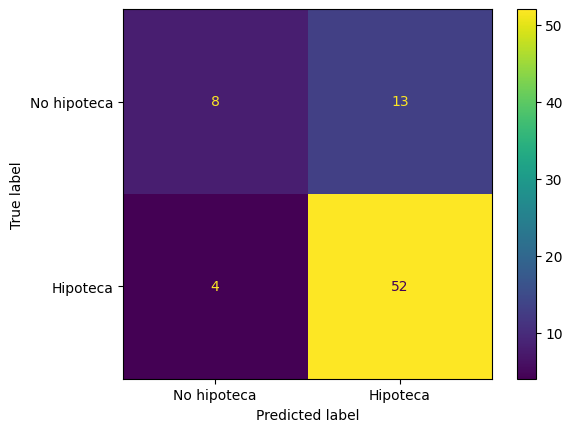

In [ ]:
print("\nANN Classification Report:")
eval  = model.evaluate(X_test, y_test)
# precision = precision_score(y_test, ann_pred, average='weighted')

# Mostra de les mètriques amb 4 decimals
print(f"loss: {eval[0]*100:.2f}%")
print(f"accuracy: {eval[1]*100:.2f}%")
cm = confusion_matrix(y_test, ann_pred.round())  # Arrodoneix les prediccions a 0 o 1

# Visualitzar la matriu de confusió amb ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No hipoteca', 'Hipoteca'])
disp.plot()
plt.show()

# Fase 5: Conclusió

L'ús de PCA amb dades vectorizades i els hiperparametres escollits no ha sigut molt fructuós, per tant podem dir que la selecció de categories no ha fet que millori els rendiments

# Fase 6: Conclusió final

Com a primeres proves hem pogut observar certa millora vectoritzant les dades d'entrada, no obstant, no ha sigut una gran millora, ja que el nostre millor algoritme no ha millorat tot el contrari ha empitjorat, en el cas dels altres algorismes han sigut funcionals. Hem pogut observar quin es el millor model per tractar amb dades sense manipularles, també hem pogut comprovar que els hiperparametres trobats amb les dades sense categoritzar, no hens han servit per millorar, tot contrary.